https://mlbootcamp.ru/article/tutorial/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url='crx.data'
data = pd.read_csv(url, header=None, na_values='?')

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [11]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [7]:
data.shape

(690, 16)

In [4]:
data.columns = ['A' + str(i) for i in range(1, 16)] + ['class']
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
data['A5'][687]

'p'

In [6]:
data.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [7]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class']
['A2', 'A3', 'A8', 'A11', 'A14', 'A15']


In [17]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [8]:
for c in categorical_columns:
    print(data[c].unique())

['b' 'a' nan]
['u' 'y' nan 'l']
['g' 'p' nan 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' nan]
['v' 'h' 'bb' 'ff' 'j' 'z' nan 'o' 'dd' 'n']
['t' 'f']
['t' 'f']
['f' 't']
['g' 's' 'p']
['+' '-']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000005554358>,
      dtype=object)

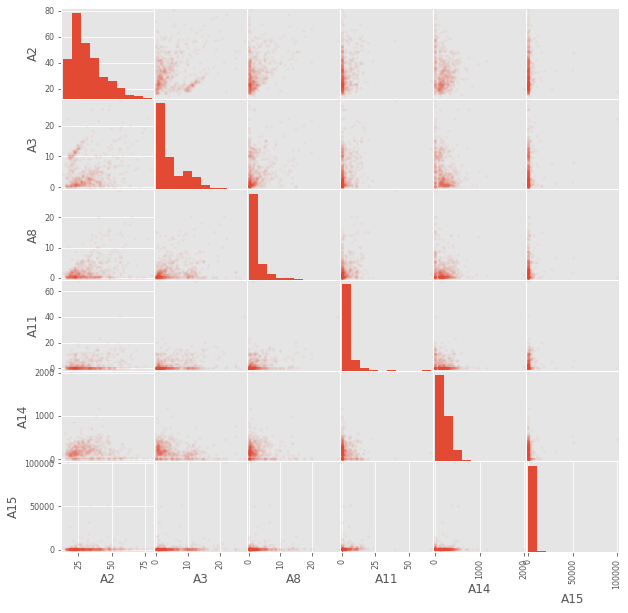

In [24]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.05, figsize=(10, 10))

In [9]:
data.corr() #корреляционную матрицу

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.202317,0.395751,0.185912,-0.079812,0.018553
A3,0.202317,1.000000,0.298902,0.271207,-0.224242,0.123121
A8,0.395751,0.298902,1.000000,0.322330,-0.077163,0.051345
A11,0.185912,0.271207,0.322330,1.000000,-0.120096,0.063692
A14,-0.079812,-0.224242,-0.077163,-0.120096,1.000000,0.066853
A15,0.018553,0.123121,0.051345,0.063692,0.066853,1.000000


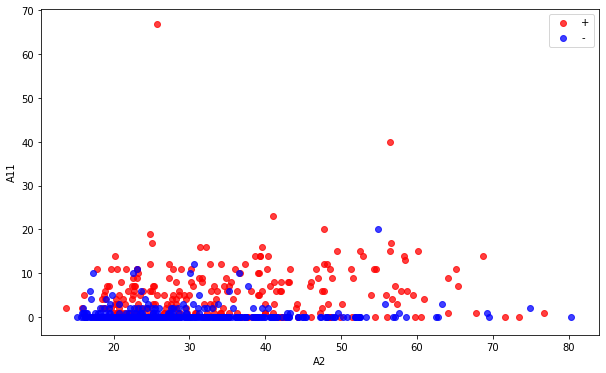

In [10]:
col1 = 'A2'
col2 = 'A11'

plt.figure(figsize=(10, 6))

plt.scatter(data[col1][data['class'] == '+'],
            data[col2][data['class'] == '+'],
            alpha=0.75,
            color='red',
            label='+')

plt.scatter(data[col1][data['class'] == '-'],
            data[col2][data['class'] == '-'],
            alpha=0.75,
            color='blue',
            label='-')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

# Пропущенные значения

In [11]:
data.count(axis=0)

A1       678
A2       678
A3       690
A4       684
A5       684
A6       681
A7       681
A8       690
A9       690
A10      690
A11      690
A12      690
A13      690
A14      677
A15      690
class    690
dtype: int64

Количественные признаки

Заполнить пропущенные значения можно с помощью метода fillna. Заполним, например, медианными значениями.

In [12]:
data = data.fillna(data.median(axis=0), axis=0)

Категориальные признаки

In [13]:
data['A1'].describe()

count     678
unique      2
top         b
freq      468
Name: A1, dtype: object

In [14]:
data['A1'] = data['A1'].fillna('b')

Автоматизируем процесс:

In [15]:
data_describe = data.describe(include=[object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [16]:
data[categorical_columns].describe()

,A1,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,480,525,525,146,408,361,395,374,625,383


# Векторизация

Вначале выделим бинарные и небинарные признаки:

In [17]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['A1', 'A9', 'A10', 'A12', 'class'] ['A4', 'A5', 'A6', 'A7', 'A13']


In [18]:
data.at[data['A1'] == 'b', 'A1'] = 0
data.at[data['A1'] == 'a', 'A1'] = 1
data['A1'].describe()

count    690.000000
mean       0.304348
std        0.460464
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: A1, dtype: float64

In [19]:
data_describe = data.describe(include=[object])
data_describe

,A4,A5,A6,A7,A9,A10,A12,A13,class
count,690,690,690,690,690,690,690,690,690
unique,3,3,14,9,2,2,2,3,2
top,u,g,c,v,t,f,f,g,-
freq,525,525,146,408,361,395,374,625,383


In [20]:
for c in binary_columns[1:]:
    top = data_describe[c]['top']
    top_items = data[c] == top
    data.loc[top_items, c] = 0
    data.loc[np.logical_not(top_items), c] = 1

In [21]:
data[binary_columns].describe()

,A1,A9,A10,A12,class
count,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.304348,0.476812,0.427536,0.457971,0.444928
std,0.460464,0.499824,0.495080,0.498592,0.497318
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Небинарные признаки

In [22]:
data['A4'].unique()

array(['u', 'y', 'l'], dtype=object)

Заменим признак A4 тремя признаками: A4_u, A4_y, A4_l.
Такую векторизацию осуществляет в pandas метод get_dummies

In [23]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c',
       'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m',
       'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h',
       'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


# Нормализация количественных признаков

каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [24]:
data_numerical = data[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,A2,A3,A8,A11,A14,A15
count,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02,6.900000e+02
mean,-2.497197e-15,1.956567e-16,4.942906e-16,1.029772e-17,3.861645e-17,-2.059544e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.497787e+00,-9.559198e-01,-6.643947e-01,-4.935286e-01,-1.066043e+00,-1.952717e-01
25%,-7.456942e-01,-7.550425e-01,-6.150897e-01,-4.935286e-01,-6.014412e-01,-1.952717e-01
50%,-2.575087e-01,-4.035072e-01,-3.655762e-01,-4.935286e-01,-1.368388e-01,-1.943120e-01
75%,5.221970e-01,4.919034e-01,1.200038e-01,1.233822e-01,5.136044e-01,-1.193615e-01
max,4.109180e+00,4.668645e+00,7.851932e+00,1.328414e+01,1.054901e+01,1.899821e+01


# Соединяем все в одну таблицу

In [25]:
data = pd.concat((data_numerical, data[binary_columns], data_nonbinary), axis=1)
data = pd.DataFrame(data, dtype=float)
print(data.shape)
print(data.columns)

(690, 43)
Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12',
       'class', 'A4_l', 'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa',
       'A6_c', 'A6_cc', 'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k',
       'A6_m', 'A6_q', 'A6_r', 'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff',
       'A7_h', 'A7_j', 'A7_n', 'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p',
       'A13_s'],
      dtype='object')


In [26]:
X = data.drop(('class'), axis=1)  # Выбрасываем столбец 'class'.
y = data['class']
feature_names = X.columns
print(feature_names)

Index(['A2', 'A3', 'A8', 'A11', 'A14', 'A15', 'A1', 'A9', 'A10', 'A12', 'A4_l',
       'A4_u', 'A4_y', 'A5_g', 'A5_gg', 'A5_p', 'A6_aa', 'A6_c', 'A6_cc',
       'A6_d', 'A6_e', 'A6_ff', 'A6_i', 'A6_j', 'A6_k', 'A6_m', 'A6_q', 'A6_r',
       'A6_w', 'A6_x', 'A7_bb', 'A7_dd', 'A7_ff', 'A7_h', 'A7_j', 'A7_n',
       'A7_o', 'A7_v', 'A7_z', 'A13_g', 'A13_p', 'A13_s'],
      dtype='object')


In [27]:
print(X.shape)
print(y.shape)
N, d = X.shape

(690, 42)
(690,)


# Обучающая и тестовая выборки

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

483 207


Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:¶
kNN – k ближайших соседей	sklearn.neighbors.KNeighborsClassifier
LDA – линейный дискриминантный анализ	sklearn.lda.LDA
QDA – квадратичный дискриминантный анализ	sklearn.qda.QDA
Logistic – логистическая регрессия	sklearn.linear_model.LogisticRegression
SVC – машина опорных векторов	sklearn.svm.SVC
Tree – деревья решений	sklearn.tree.DecisionTreeClassifier
RF – случайный лес	sklearn.ensemble.RandomForestClassifier
AdaBoost – адаптивный бустинг	sklearn.ensemble.AdaBoostClassifier
GBT – градиентный бустинг деревьев решений	sklearn.ensemble.GradientBoostingClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [32]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.14699792960662525 0.16908212560386474


In [34]:
from sklearn.model_selection import GridSearchCV
n_neighbors_array = [1, 3, 5, 7, 10, 15]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': n_neighbors_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

c:\users\novashov_ev\project\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.20703933747412007 7


In [36]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))
print(err_train, err_test)

0.15113871635610765 0.1642512077294686


# SVC – машина опорных векторов

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.14492753623188406 0.13043478260869565


c:\users\novashov_ev\project\mlbootcamp_sample\venv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Радиальное ядро SVC(kernel='rbf')

In [41]:
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
gamma_array = np.logspace(-5, 2, num=8)
svc = SVC(kernel='rbf')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)

c:\users\novashov_ev\project\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV error    =  0.13871635610766042
best C      =  1.0
best gamma  =  0.01


In [43]:
svc = SVC(kernel='rbf', C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.13457556935817805 0.1111111111111111


Линейное ядро

In [45]:
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-3, 3, num=7)
svc = SVC(kernel='linear')
grid = GridSearchCV(svc, param_grid={'C': C_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)

c:\users\novashov_ev\project\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV error    =  0.15113871635610765
best C      =  0.1


In [47]:
svc = SVC(kernel='linear', C=grid.best_estimator_.C)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.15113871635610765 0.12560386473429952


Полиномиальное ядро

In [49]:
from sklearn.model_selection import GridSearchCV
C_array = np.logspace(-5, 2, num=8)
gamma_array = np.logspace(-5, 2, num=8)
degree_array = [2, 3, 4]
svc = SVC(kernel='poly')
grid = GridSearchCV(svc, param_grid={'C': C_array, 'gamma': gamma_array, 'degree': degree_array})
grid.fit(X_train, y_train)
print('CV error    = ', 1 - grid.best_score_)
print('best C      = ', grid.best_estimator_.C)
print('best gamma  = ', grid.best_estimator_.gamma)
print('best degree = ', grid.best_estimator_.degree)

c:\users\novashov_ev\project\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CV error    =  0.13871635610766042
best C      =  0.0001
best gamma  =  10.0
best degree =  2


In [50]:
svc = SVC(kernel='poly', C=grid.best_estimator_.C, 
          gamma=grid.best_estimator_.gamma, degree=grid.best_estimator_.degree)
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print(err_train, err_test)

0.09730848861283643 0.12077294685990338


# Random Forest – случайный лес

In [51]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.10144927536231885


In [67]:
from sklearn.model_selection import GridSearchCV
n_estimators_array = [1, 5, 10, 50, 75, 100, 150, 200, 300]
rf = ensemble.RandomForestClassifier(random_state=11)
grid = GridSearchCV(rf, param_grid={'n_estimators': n_estimators_array})
grid.fit(X_train, y_train)
best_cv_err = 1 - grid.best_score_
best_n_estimators = grid.best_estimator_.n_estimators
print(best_cv_err, best_n_estimators)

c:\users\novashov_ev\project\mlbootcamp_sample\venv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.13457556935817805 50


In [68]:
rf = ensemble.RandomForestClassifier(n_estimators=50, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.11594202898550725


## Отбор признаков (Feature Selection) с помощью алгоритма случайного леса

In [76]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print(indices)

print("Feature importances:")
for f, idx in enumerate(indices):
    print("{:2d}. feature '{:5s}' ({:.4f})".format(f + 1, feature_names[idx], importances[idx]))

[ 7  2  3  5  4  1  0  8 29  9  6 33 37 26 28 24 13 15 39 21 18 41 17 12
 11 32 30 22 16 25 20 34 40 19 31 35 10 23 14 38 27 36]
Feature importances:
 1. feature 'A9   ' (0.2211)
 2. feature 'A8   ' (0.1059)
 3. feature 'A11  ' (0.0997)
 4. feature 'A15  ' (0.0798)
 5. feature 'A14  ' (0.0783)
 6. feature 'A3   ' (0.0746)
 7. feature 'A2   ' (0.0705)
 8. feature 'A10  ' (0.0478)
 9. feature 'A6_x ' (0.0184)
10. feature 'A12  ' (0.0142)
11. feature 'A1   ' (0.0139)
12. feature 'A7_h ' (0.0137)
13. feature 'A7_v ' (0.0131)
14. feature 'A6_q ' (0.0117)
15. feature 'A6_w ' (0.0111)
16. feature 'A6_k ' (0.0107)
17. feature 'A5_g ' (0.0103)
18. feature 'A5_p ' (0.0095)
19. feature 'A13_g' (0.0094)
20. feature 'A6_ff' (0.0085)
21. feature 'A6_cc' (0.0074)
22. feature 'A13_s' (0.0074)
23. feature 'A6_c ' (0.0071)
24. feature 'A4_y ' (0.0063)
25. feature 'A4_u ' (0.0062)
26. feature 'A7_ff' (0.0058)
27. feature 'A7_bb' (0.0054)
28. feature 'A6_i ' (0.0052)
29. feature 'A6_aa' (0.0042)
30. featu

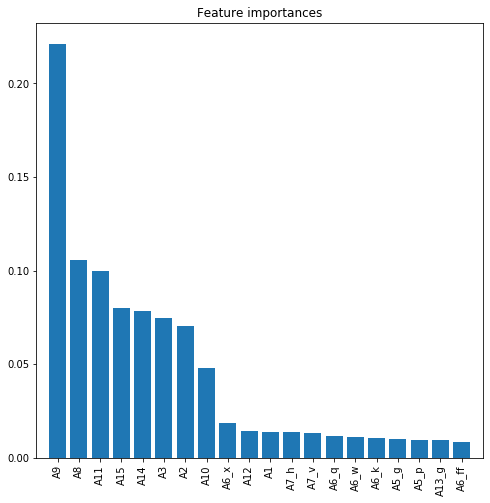

In [77]:
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [78]:
best_features = indices[:8]
best_features_names = feature_names[best_features]
print(best_features_names)

Index(['A9', 'A8', 'A11', 'A15', 'A14', 'A3', 'A2', 'A10'], dtype='object')


# GBT – градиентный бустинг деревьев решений

In [79]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print(err_train, err_test)

0.024844720496894408 0.10144927536231885


In [81]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=100, random_state=11)
gbt.fit(X_train[best_features_names], y_train)

err_train = np.mean(y_train != gbt.predict(X_train[best_features_names]))
err_test = np.mean(y_test != gbt.predict(X_test[best_features_names]))
print(err_train, err_test)

0.035196687370600416 0.10628019323671498


In [82]:
type(X_train)

pandas.core.frame.DataFrame

# Отборочное задание

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/train.tar.gz', compression='gzip', header=0, sep=';', quotechar='"', nrows=10000)

In [82]:
df.head(10)

,train.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
0,1379278800,0,2733540231,3500392421,4454,15573,11,995,2,176,15,671,"384,382,96,88,185,49,385,268,448,438,279,420,1...",NaN,NaN,32,0,0,106
1,1379278800,0,1964843810,1232327635,2081,2547,11,995,2,361,15,802,"96,49,385,268,107,438,418,124,357,17,435,130,3...",NaN,NaN,1,0,0,106
2,1379278800,0,660357674,2066571765,602,29581,29,995,0,468,15,758,"170,169,205,204,176,252,243,382,98,220,222,181...",NaN,NaN,119,0,0,103
3,1379278800,0,2962648192,2373358995,4018,36969,30,995,2,8,15,67,"273,205,383,382,381,219,216,215,225,49,47,54,3...","28071,6916,9108",NaN,0,0,0,106
4,1379278800,0,1822613420,446973819,2081,23457,35,995,0,452,15,821,"268,419,357,18,331,59,57,99,154,155,76,412,122...",NaN,NaN,5,0,0,106
5,1379278800,0,2230694362,462046911,4781,16144,6,1694,0,390,22,822,"273,184,180,49,54,269,100,270,419,80,83,74,5,3...",NaN,"43845,45509,45500,15529,33701,49513,49517,3834...",3,0,1,105
6,1379278800,0,149405498,2008468818,5454,24226,11,995,0,313,15,821,"273,205,176,247,249,252,384,382,375,93,88,188,...",NaN,NaN,0,0,0,105
7,1379278800,0,1651740157,929846473,5678,4314,10,995,2,419,15,24,"273,170,169,205,173,176,246,213,252,243,380,38...","18587,21441,22177",NaN,26,0,0,104
8,1379278800,0,1207866034,1976462420,3353,4241,88,995,2,177,15,5,"88,215,53,269,417,1,17,239,331,60,57,306,277,9...","14566,12599",NaN,52,0,0,106
9,1379278800,0,2132391877,3482861549,3595,6952,83,995,2,419,15,479,"273,169,205,250,384,95,96,215,185,184,49,47,53...","423,19225,5001",NaN,0,0,0,105


In [83]:
df.tail(10)

,train.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,CG1,CG2,CG3,l1,l2,C11,C12
9990,1379278881,0,3111214938,3882259139,4069,7802,30,995,0,451,15,1131,"382,220,49,268,138,422,419,161,74,123,253,356,...",20263,NaN,6,0,0,104
9991,1379278881,0,2371358573,2432773626,400,23137,13,995,0,293,15,802,"96,88,268,280,419,123,2,357,17,131,331,59,57,3...",NaN,NaN,0,0,0,106
9992,1379278881,0,3453613476,4239857121,6162,845,25,1998,2,464,49,821,"273,169,205,204,245,242,379,384,382,96,89,215,...","22682,4964,10673","45509,75,33701,56597,46839,52988,27636,33144,5...",1,0,1,106
9993,1379278881,0,609756080,3477850799,968,11317,87,995,0,282,15,802,"169,246,96,220,422,449,100,103,419,85,74,123,5...","8440,17515",NaN,0,0,0,104
9994,1379278881,0,2899159029,2112723277,515,30790,13,995,0,293,15,802,"269,420,357,18,330,60,57,99,154,155,76,412,122...",NaN,NaN,0,0,0,104
9995,1379278881,0,3002354239,2219305442,400,31673,13,995,2,293,15,48,"385,373,431,99,154,155,76,412,122,139,333,332,...",NaN,NaN,3,0,0,105
9996,1379278881,0,1446415135,1530013282,5295,13017,11,995,0,176,15,51,"273,205,384,382,375,93,98,96,88,216,224,183,50...",NaN,NaN,0,0,0,102
9997,1379278881,0,1039592267,3761196692,270,4302,0,3905,2,147,80,253,"273,170,169,205,204,174,176,380,384,375,92,96,...",NaN,46594,0,0,1,104
9998,1379278881,0,2485311061,1569139679,2360,27275,88,995,0,177,15,1331,"273,205,242,380,379,382,375,96,220,222,216,224...",NaN,NaN,2,0,0,104
9999,1379278881,0,1876129258,739666464,2568,12522,30,995,0,428,15,821,"169,205,204,245,246,380,384,382,96,88,181,180,...","19280,3722,21818,29087,29087",NaN,0,0,0,105


In [84]:
df.shape

(10000, 19)

In [85]:
df.describe()

,train.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,l1,l2,C11,C12
count,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000
mean,1.379279e+09,0.002300,2.157855e+09,2.122366e+09,2725.646800,20713.934900,27.815000,1179.922400,0.945900,297.74530,19.40870,669.141800,27.129300,0.013800,0.1298,104.452000
std,2.264491e+01,0.047906,1.230746e+09,1.232185e+09,1909.643769,10441.104756,27.496639,655.779299,0.996831,99.99225,15.54832,417.724334,275.474039,0.161902,0.3361,1.327355
min,1.379279e+09,0.000000,7.828374e+06,2.855711e+06,14.000000,47.000000,0.000000,18.000000,0.000000,4.00000,0.00000,2.000000,0.000000,0.000000,0.0000,100.000000
25%,1.379279e+09,0.000000,1.077745e+09,1.152926e+09,602.000000,11686.000000,10.000000,995.000000,0.000000,251.00000,15.00000,305.000000,0.000000,0.000000,0.0000,104.000000
50%,1.379279e+09,0.000000,2.156479e+09,2.082769e+09,2646.000000,22434.000000,13.000000,995.000000,0.000000,293.00000,15.00000,802.000000,0.000000,0.000000,0.0000,104.000000
75%,1.379279e+09,0.000000,3.254091e+09,3.128137e+09,4454.000000,30636.750000,36.000000,995.000000,2.000000,361.00000,15.00000,821.000000,3.000000,0.000000,0.0000,106.000000
max,1.379279e+09,1.000000,4.294503e+09,4.293217e+09,6386.000000,37164.000000,100.000000,3966.000000,2.000000,471.00000,106.00000,1390.000000,9700.000000,5.000000,1.0000,107.000000


In [101]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['CG1', 'CG2', 'CG3']
['train.csv', 'label', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'l1', 'l2', 'C11', 'C12']


In [103]:
df[categorical_columns].describe()

,CG1,CG2,CG3
count,994,311,113
unique,577,180,100
top,"99,154,155,76,412,122,139,333,332,335,334",2894,46594
freq,10,9,8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F838C18>,
      dtype=object)

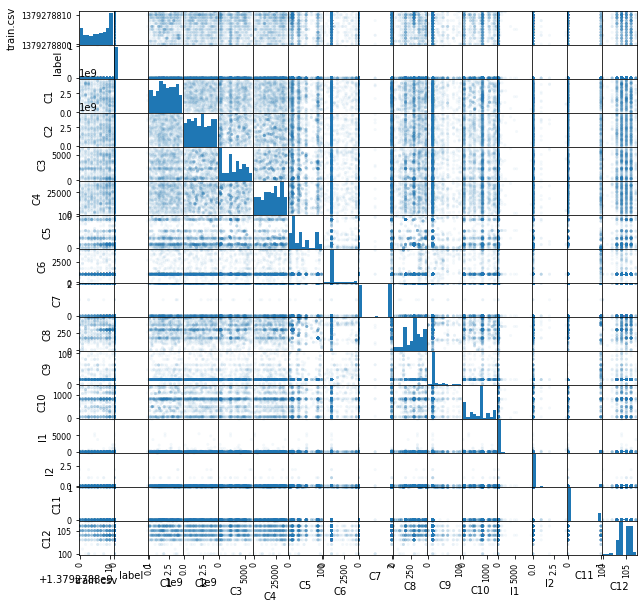

In [104]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.05, figsize=(10, 10))

In [105]:
df.corr()

,train.csv,label,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,l1,l2,C11,C12
train.csv,1.000000,0.022513,-0.062350,-0.007104,-0.013205,0.091407,-0.152675,-0.105074,-0.108433,0.005446,-0.098803,0.037353,0.034191,-0.073007,-0.103132,-0.155598
label,0.022513,1.000000,-0.010973,0.047827,0.024397,0.012481,0.037678,0.032029,0.044321,0.007319,0.025676,-0.011254,-0.005442,-0.003938,0.036701,0.031234
C1,-0.062350,-0.010973,1.000000,-0.053596,-0.027166,-0.022119,-0.074690,0.033291,0.079225,0.047477,0.022453,-0.018500,-0.056341,-0.022377,0.072152,-0.070977
C2,-0.007104,0.047827,-0.053596,1.000000,0.079035,0.025542,0.031094,0.003663,-0.047678,-0.017991,0.031436,0.002792,-0.012202,-0.012430,0.011532,-0.028895
C3,-0.013205,0.024397,-0.027166,0.079035,1.000000,0.004673,-0.011840,0.112948,0.085624,0.078679,0.100531,-0.042557,0.000955,0.051197,0.172976,0.067297
C4,0.091407,0.012481,-0.022119,0.025542,0.004673,1.000000,-0.033993,-0.017181,-0.044061,-0.002241,-0.033100,0.014643,-0.059982,-0.054483,-0.032837,-0.045144
C5,-0.152675,0.037678,-0.074690,0.031094,-0.011840,-0.033993,1.000000,-0.052446,0.077229,-0.216385,-0.061298,-0.010764,0.059862,-0.027256,-0.097811,0.177645
C6,-0.105074,0.032029,0.033291,0.003663,0.112948,-0.017181,-0.052446,1.000000,-0.007440,-0.003191,0.688525,0.006652,-0.038234,-0.031879,0.765613,-0.158938
C7,-0.108433,0.044321,0.079225,-0.047678,0.085624,-0.044061,0.077229,-0.007440,1.000000,0.023132,0.025826,0.044034,-0.071117,0.022143,0.033183,0.215616
C8,0.005446,0.007319,0.047477,-0.017991,0.078679,-0.002241,-0.216385,-0.003191,0.023132,1.000000,0.006759,-0.043372,0.007318,0.013842,0.102125,0.037605


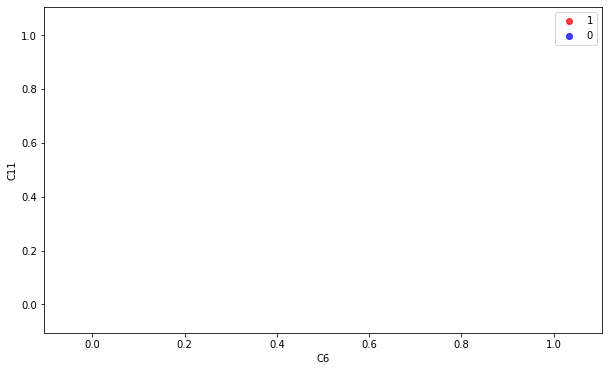

In [111]:
col1 = 'C6'
col2 = 'C11'

plt.figure(figsize=(10, 6))

plt.scatter(df[col1][df['label'] == '1'],
            df[col2][df['label'] == '1'],
            alpha=0.75,
            color='red',
            label='1')

plt.scatter(df[col1][df['label'] == '0'],
            df[col2][df['label'] == '0'],
            alpha=0.75,
            color='blue',
            label='0')

plt.xlabel(col1)
plt.ylabel(col2)
plt.legend(loc='best');

# Пропущенные значения

In [86]:
df.count(axis=0)

train.csv    10000
label        10000
C1           10000
C2           10000
C3           10000
C4           10000
C5           10000
C6           10000
C7           10000
C8           10000
C9           10000
C10          10000
CG1           9940
CG2           2420
CG3            842
l1           10000
l2           10000
C11          10000
C12          10000
dtype: int64

In [89]:
df = df['CG1'].str.split(',',expand=True)

http://datalytics.ru/all/kak-v-pandas-razbit-kolonku-na-neskolko-kolonok/

In [92]:
df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,384,382,96,88,185,49,385,268,448,438,...,None,None,None,None,None,None,None,None,None,None
1,96,49,385,268,107,438,418,124,357,17,...,None,None,None,None,None,None,None,None,None,None
2,170,169,205,204,176,252,243,382,98,220,...,None,None,None,None,None,None,None,None,None,None
3,273,205,383,382,381,219,216,215,225,49,...,None,None,None,None,None,None,None,None,None,None
4,268,419,357,18,331,59,57,99,154,155,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,246,384,382,49,422,103,279,419,124,236,...,None,None,None,None,None,None,None,None,None,None
96,205,380,384,382,98,96,220,222,186,188,...,None,None,None,None,None,None,None,None,None,None
97,169,205,204,173,176,246,213,380,379,382,...,None,None,None,None,None,None,None,None,None,None
98,242,243,88,216,50,53,54,52,56,448,...,None,None,None,None,None,None,None,None,None,None


In [91]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
count,9940,9940,9940,9940,9940,9940,9940,9940,9940,9940,...,11,10,9,6,4,3,2,1,1,1
unique,101,134,153,170,194,190,207,216,226,235,...,8,7,5,5,3,3,2,1,1,1
top,273,205,205,96,96,96,422,96,422,422,...,286,335,399,399,267,399,267,291,290,399
freq,2753,1015,785,464,391,410,321,312,306,276,...,2,2,3,2,2,1,1,1,1,1


In [ ]:
df1 = pd.DataFrame(('43563456,2345234','46545654,456454'))

In [75]:
df1.columns=['a']

In [76]:
df1 = df1['a'].str.split(',',expand=True)

In [78]:
df1

,0,1
0,43563456,2345234
1,46545654,456454
